In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

In [8]:
# Step 1: Generate 300 random variables X in the range of 0 to 1000
X = np.random.uniform(0, 1001, 300)

# Step 2: Determine Y based on the condition
Y = np.where((X > 500) & (X < 800), 1, 0)

# Convert to DataFrame for easier handling
data = pd.DataFrame({'X': X, 'Y': Y})

In [9]:
# Step 3: Implement Logistic Regression
X_reshaped = X.reshape(-1, 1)  # Reshape for sklearn
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, Y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y1 = log_reg.predict(X_reshaped)
accuracy_log_reg = accuracy_score(Y, y1)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')

Logistic Regression Accuracy: 0.56


In [10]:
# Step 4: Implement Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y2 = svm_model.predict(X_reshaped)
accuracy_svm = accuracy_score(Y, y2)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

SVM Accuracy: 0.69


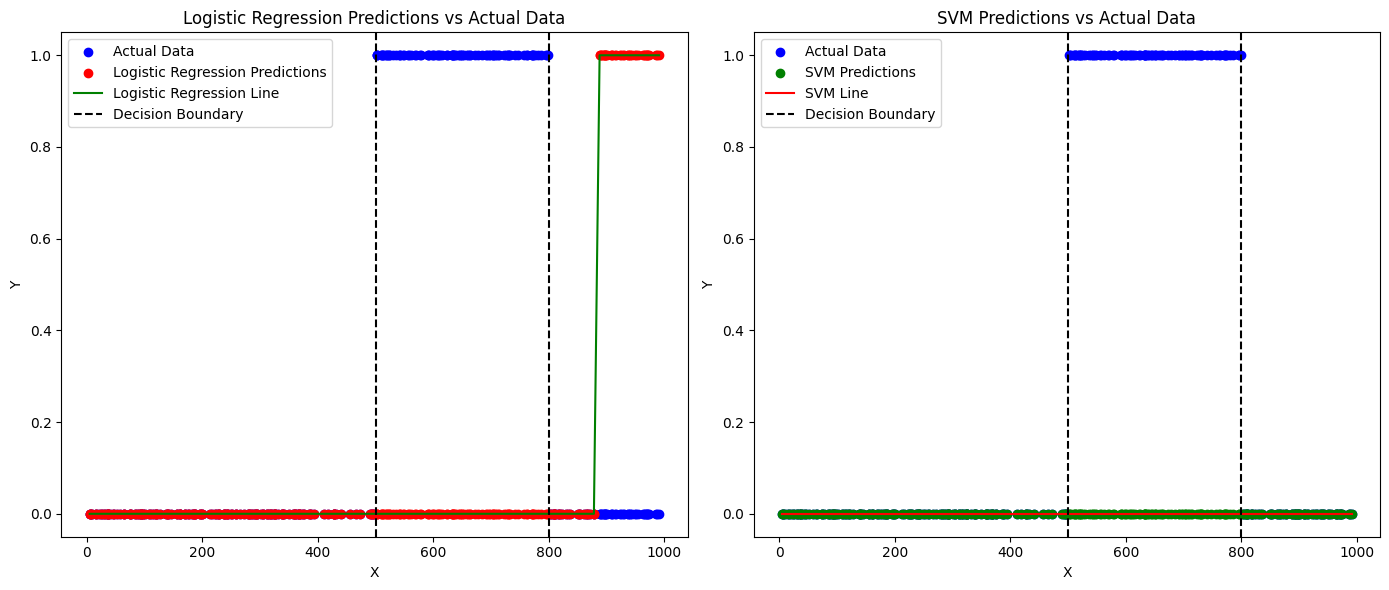

In [11]:
# Step 5: Reorder by value of X
data['Y1'] = y1
data['Y2'] = y2
data_sorted_logistic = data.sort_values(by='X')
data_sorted_svm = data.sort_values(by='X')

# Step 6: Plot actual data and Logistic Regression predictions
plt.figure(figsize=(14, 6))

# Logistic Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(data_sorted_logistic['X'], data_sorted_logistic['Y'], color='blue', label='Actual Data')
plt.scatter(data_sorted_logistic['X'], data_sorted_logistic['Y1'], color='red', label='Logistic Regression Predictions')
plt.plot(data_sorted_logistic['X'], data_sorted_logistic['Y1'], color='green', label='Logistic Regression Line')
plt.title('Logistic Regression Predictions vs Actual Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axvline(x=500, color='black', linestyle='--', label='Decision Boundary')
plt.axvline(x=800, color='black', linestyle='--')
plt.legend()

# Step 7: Plot actual data and SVM predictions
plt.subplot(1, 2, 2)
plt.scatter(data_sorted_svm['X'], data_sorted_svm['Y'], color='blue', label='Actual Data')
plt.scatter(data_sorted_svm['X'], data_sorted_svm['Y2'], color='green', label='SVM Predictions')
plt.plot(data_sorted_svm['X'], data_sorted_svm['Y2'], color='red', label='SVM Line')
plt.title('SVM Predictions vs Actual Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axvline(x=500, color='black', linestyle='--', label='Decision Boundary')
plt.axvline(x=800, color='black', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()